# Asistencia - Avances Proyecfo Final

### Juan M. González-Campo
### Lourdes Saavedra
### Manuel Rodas
### Wilfredo Gallegos
### Dolan Cuellar

## Carga de los datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('DelayedFlights.csv')

## Limpieza de Datos

In [3]:

df = df.iloc[:, 1:]  # Eliminar la primera columna sin nombre
print(df.head())



   Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
0  2008      1           3          4   2003.0        1955   2211.0   
1  2008      1           3          4    754.0         735   1002.0   
2  2008      1           3          4    628.0         620    804.0   
3  2008      1           3          4   1829.0        1755   1959.0   
4  2008      1           3          4   1940.0        1915   2121.0   

   CRSArrTime UniqueCarrier  FlightNum  ... TaxiIn  TaxiOut  Cancelled  \
0        2225            WN        335  ...    4.0      8.0        0.0   
1        1000            WN       3231  ...    5.0     10.0        0.0   
2         750            WN        448  ...    3.0     17.0        0.0   
3        1925            WN       3920  ...    3.0     10.0        0.0   
4        2110            WN        378  ...    4.0     10.0        0.0   

   CancellationCode  Diverted  CarrierDelay WeatherDelay NASDelay  \
0                 N       0.0           NaN          NaN   

In [4]:
# convertir a tipo de dato entero o bool
df['Year'] = df['Year'].astype(int)
df['Month'] = df['Month'].astype(int)
df['DayofMonth'] = df['DayofMonth'].astype(int)
df['DayOfWeek'] = df['DayOfWeek'].astype(int)
df['Cancelled'] = df['Cancelled'].astype(bool)
df['Diverted'] = df['Diverted'].astype(bool)


In [5]:
# Eliminar duplicados

df.drop_duplicates(inplace=True)

null_counts = df.isnull().sum().sort_values(ascending=False)
print("Cantidad de valores nulos por columna:\n", null_counts)



Cantidad de valores nulos por columna:
 LateAircraftDelay    64993
SecurityDelay        64993
NASDelay             64993
WeatherDelay         64993
CarrierDelay         64993
TaxiIn                 747
ActualElapsedTime      746
AirTime                746
ArrDelay               746
ArrTime                746
CRSElapsedTime          35
Dest                     1
Distance                 1
CancellationCode         1
TaxiOut                  1
Cancelled                0
DayofMonth               0
DayOfWeek                0
DepTime                  0
CRSDepTime               0
Diverted                 0
FlightNum                0
TailNum                  0
Origin                   0
DepDelay                 0
Month                    0
CRSArrTime               0
UniqueCarrier            0
Year                     0
dtype: int64


In [6]:
# revisa si es mas de la mitad de los datos y si si, elimianrlos
df.dropna(thresh=df.shape[0]/2, axis=1, inplace=True)
# mostrar columna eliminadas
print("Columnas eliminadas por tener mas de la mitad de valores nulos:\n", null_counts[null_counts > df.shape[0]/2])

print(df.head())


Columnas eliminadas por tener mas de la mitad de valores nulos:
 Series([], dtype: int64)
   Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
0  2008      1           3          4   2003.0        1955   2211.0   
1  2008      1           3          4    754.0         735   1002.0   
2  2008      1           3          4    628.0         620    804.0   
3  2008      1           3          4   1829.0        1755   1959.0   
4  2008      1           3          4   1940.0        1915   2121.0   

   CRSArrTime UniqueCarrier  FlightNum  ... TaxiIn  TaxiOut  Cancelled  \
0        2225            WN        335  ...    4.0      8.0      False   
1        1000            WN       3231  ...    5.0     10.0      False   
2         750            WN        448  ...    3.0     17.0      False   
3        1925            WN       3920  ...    3.0     10.0      False   
4        2110            WN        378  ...    4.0     10.0      False   

   CancellationCode  Diverted  Carrier

In [7]:
# si la celda esta vacia en las columnas  LateAircraftDelay, ecurityDelay, NASDelay, WeatherDelay, CarrierDelay cambiar a 0
df['LateAircraftDelay'].fillna(0, inplace=True)
df['SecurityDelay'].fillna(0, inplace=True)
df['NASDelay'].fillna(0, inplace=True)
df['WeatherDelay'].fillna(0, inplace=True)
df['CarrierDelay'].fillna(0, inplace=True)
null_counts = df.isnull().sum().sort_values(ascending=False)
print("Cantidad de valores nulos por columna:\n", null_counts)



Cantidad de valores nulos por columna:
 TaxiIn               747
ArrDelay             746
ArrTime              746
ActualElapsedTime    746
AirTime              746
CRSElapsedTime        35
Dest                   1
CancellationCode       1
TaxiOut                1
Distance               1
SecurityDelay          0
NASDelay               0
WeatherDelay           0
CarrierDelay           0
Diverted               0
Cancelled              0
Year                   0
Origin                 0
DepDelay               0
Month                  0
TailNum                0
FlightNum              0
UniqueCarrier          0
CRSArrTime             0
CRSDepTime             0
DepTime                0
DayOfWeek              0
DayofMonth             0
LateAircraftDelay      0
dtype: int64


<ipython-input-7-a428eb39c054>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LateAircraftDelay'].fillna(0, inplace=True)
<ipython-input-7-a428eb39c054>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

In [8]:
#Eliminar las filas con valores nulos en ArrTime, CRSArrTime, ActualElapsedTime, CRSElapsedTime, AirTime, ArrDelay, DepDelay, TaxiIn, TaxiOut
df.dropna(subset=['ArrTime', 'CRSArrTime', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'TaxiIn', 'TaxiOut'], inplace=True)
null_counts = df.isnull().sum().sort_values(ascending=False)
print("Cantidad de valores nulos por columna:\n", null_counts)

Cantidad de valores nulos por columna:
 Year                 0
DepDelay             0
SecurityDelay        0
NASDelay             0
WeatherDelay         0
CarrierDelay         0
Diverted             0
CancellationCode     0
Cancelled            0
TaxiOut              0
TaxiIn               0
Distance             0
Dest                 0
Origin               0
ArrDelay             0
Month                0
AirTime              0
CRSElapsedTime       0
ActualElapsedTime    0
TailNum              0
FlightNum            0
UniqueCarrier        0
CRSArrTime           0
ArrTime              0
CRSDepTime           0
DepTime              0
DayOfWeek            0
DayofMonth           0
LateAircraftDelay    0
dtype: int64


## EDA

### Transformación de Variables

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 189257 entries, 0 to 190002
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               189257 non-null  int64  
 1   Month              189257 non-null  int64  
 2   DayofMonth         189257 non-null  int64  
 3   DayOfWeek          189257 non-null  int64  
 4   DepTime            189257 non-null  float64
 5   CRSDepTime         189257 non-null  int64  
 6   ArrTime            189257 non-null  float64
 7   CRSArrTime         189257 non-null  int64  
 8   UniqueCarrier      189257 non-null  object 
 9   FlightNum          189257 non-null  int64  
 10  TailNum            189257 non-null  object 
 11  ActualElapsedTime  189257 non-null  float64
 12  CRSElapsedTime     189257 non-null  float64
 13  AirTime            189257 non-null  float64
 14  ArrDelay           189257 non-null  float64
 15  DepDelay           189257 non-null  float64
 16  Origin 



```
# Tiene formato de código
```

Transformaciones de variables

In [10]:
# Modificar tipos y crear columna de fecha
df['Cancelled'] = df['Cancelled'].astype('category')
df['FlightNum'] = df['FlightNum'].astype('object')
df['TailNum'] = df['TailNum'].astype('object')
df['flightDate'] = df['Year'].astype(str) + '-' + df['Month'].astype(str) + '-' + df['DayofMonth'].astype(str)
df["DepTime"] = df["DepTime"].astype(str)
df["CRSDepTime"] = df["CRSDepTime"].astype(str)
df["ArrTime"] = df["ArrTime"].astype(str)
df["CRSArrTime"] = df["CRSArrTime"].astype(str)
df["Month"] = df["Month"].astype('category')
df["DayofMonth"] = df["DayofMonth"].astype('category')
df["DayOfWeek"] = df["DayOfWeek"].astype('category')
df["Year"] = df["Year"].astype('category')
df['flightDate'] = pd.to_datetime(df['flightDate'])
df["UniqueCarrier"] = df["UniqueCarrier"].astype('category')
df["Diverted"] = df["Diverted"].astype('category')


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 189257 entries, 0 to 190002
Data columns (total 30 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Year               189257 non-null  category      
 1   Month              189257 non-null  category      
 2   DayofMonth         189257 non-null  category      
 3   DayOfWeek          189257 non-null  category      
 4   DepTime            189257 non-null  object        
 5   CRSDepTime         189257 non-null  object        
 6   ArrTime            189257 non-null  object        
 7   CRSArrTime         189257 non-null  object        
 8   UniqueCarrier      189257 non-null  category      
 9   FlightNum          189257 non-null  object        
 10  TailNum            189257 non-null  object        
 11  ActualElapsedTime  189257 non-null  float64       
 12  CRSElapsedTime     189257 non-null  float64       
 13  AirTime            189257 non-null  float64      

### Exploración

In [12]:
# Estadísticas descriptivas
print(df.describe())

       ActualElapsedTime  CRSElapsedTime        AirTime       ArrDelay  \
count      189257.000000   189257.000000  189257.000000  189257.000000   
mean          131.359178      132.060838     106.709760      42.955727   
min            19.000000       19.000000       0.000000     -67.000000   
25%            80.000000       80.000000      57.000000       9.000000   
50%           114.000000      115.000000      88.000000      25.000000   
75%           162.000000      163.000000     135.000000      57.000000   
max           693.000000      660.000000     636.000000    1525.000000   
std            70.556682       70.368846      67.744561      56.016536   

            DepDelay       Distance         TaxiIn        TaxiOut  \
count  189257.000000  189257.000000  189257.000000  189257.000000   
mean       43.657387     746.515336       6.742810      17.906608   
min         6.000000      24.000000       0.000000       0.000000   
25%        12.000000     337.000000       4.000000      1

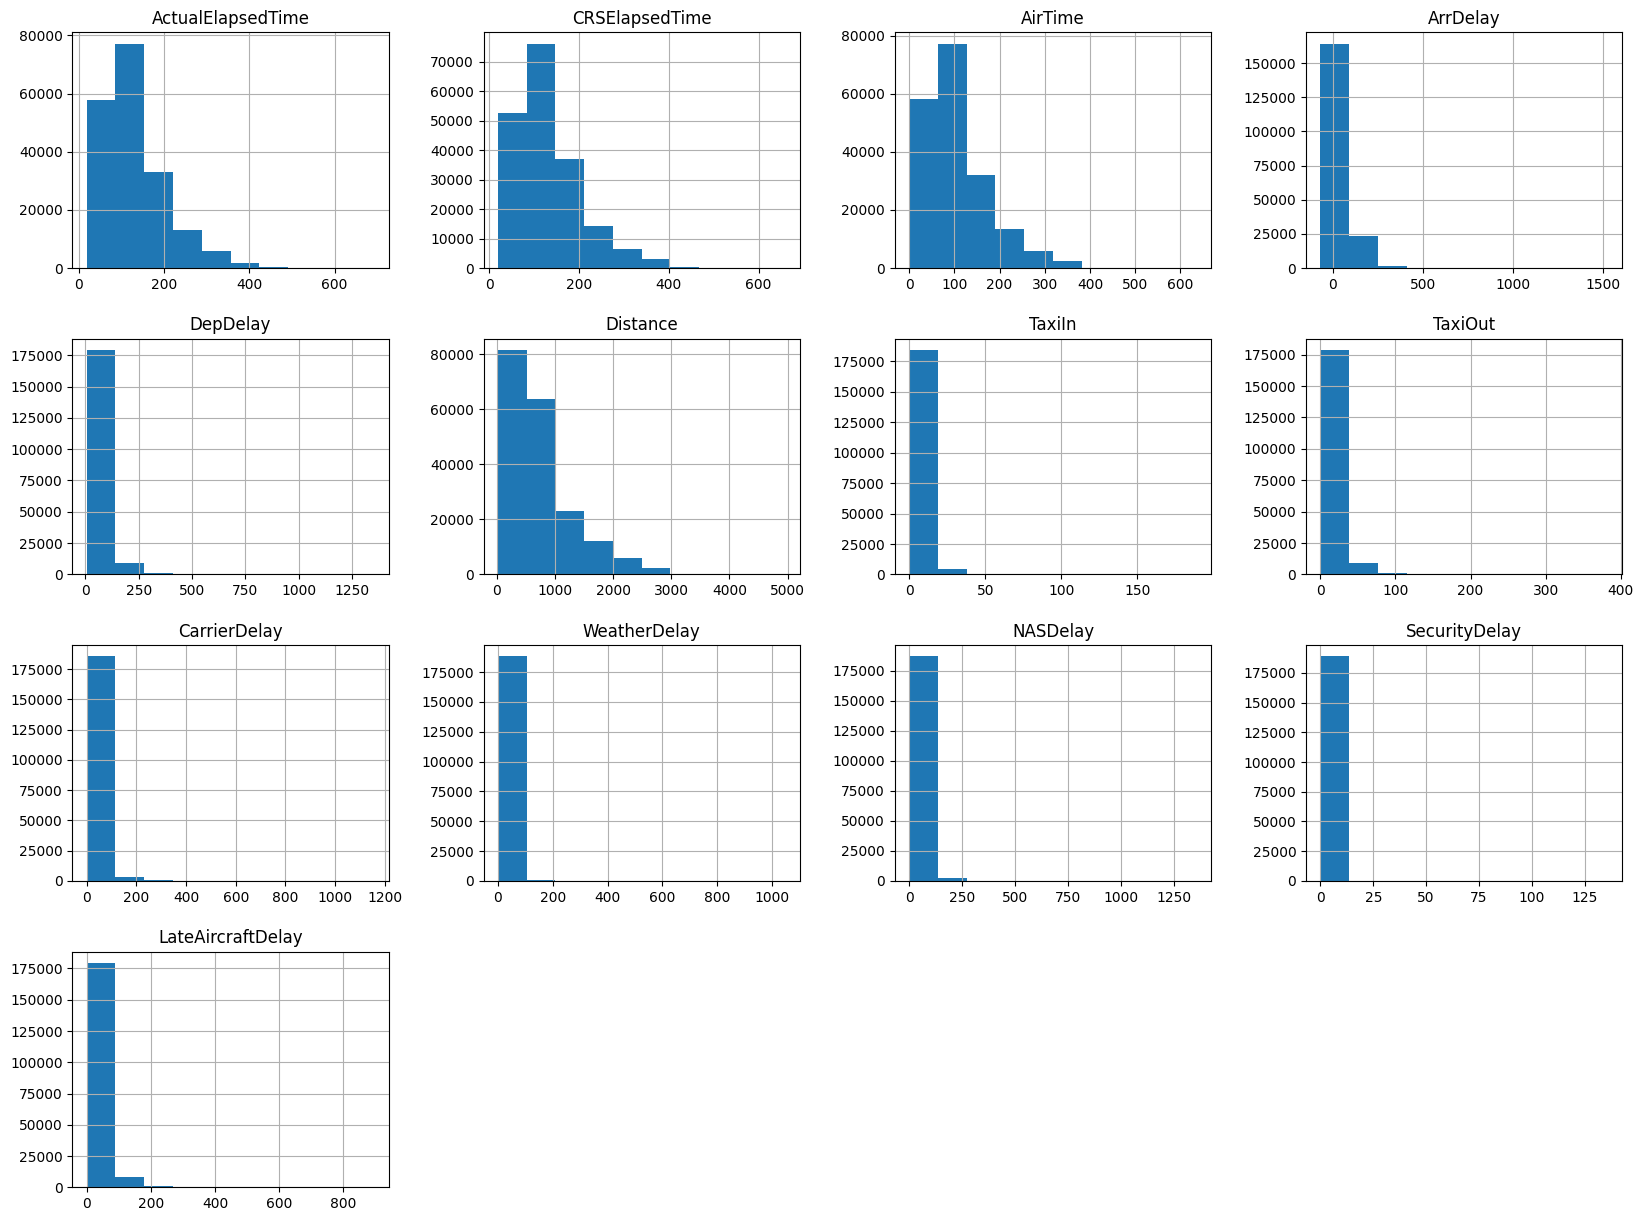

In [13]:
# Plot histograms for numerical columns
df.select_dtypes(include=["float64", "int64"]).hist(figsize=(20, 15))
plt.show()



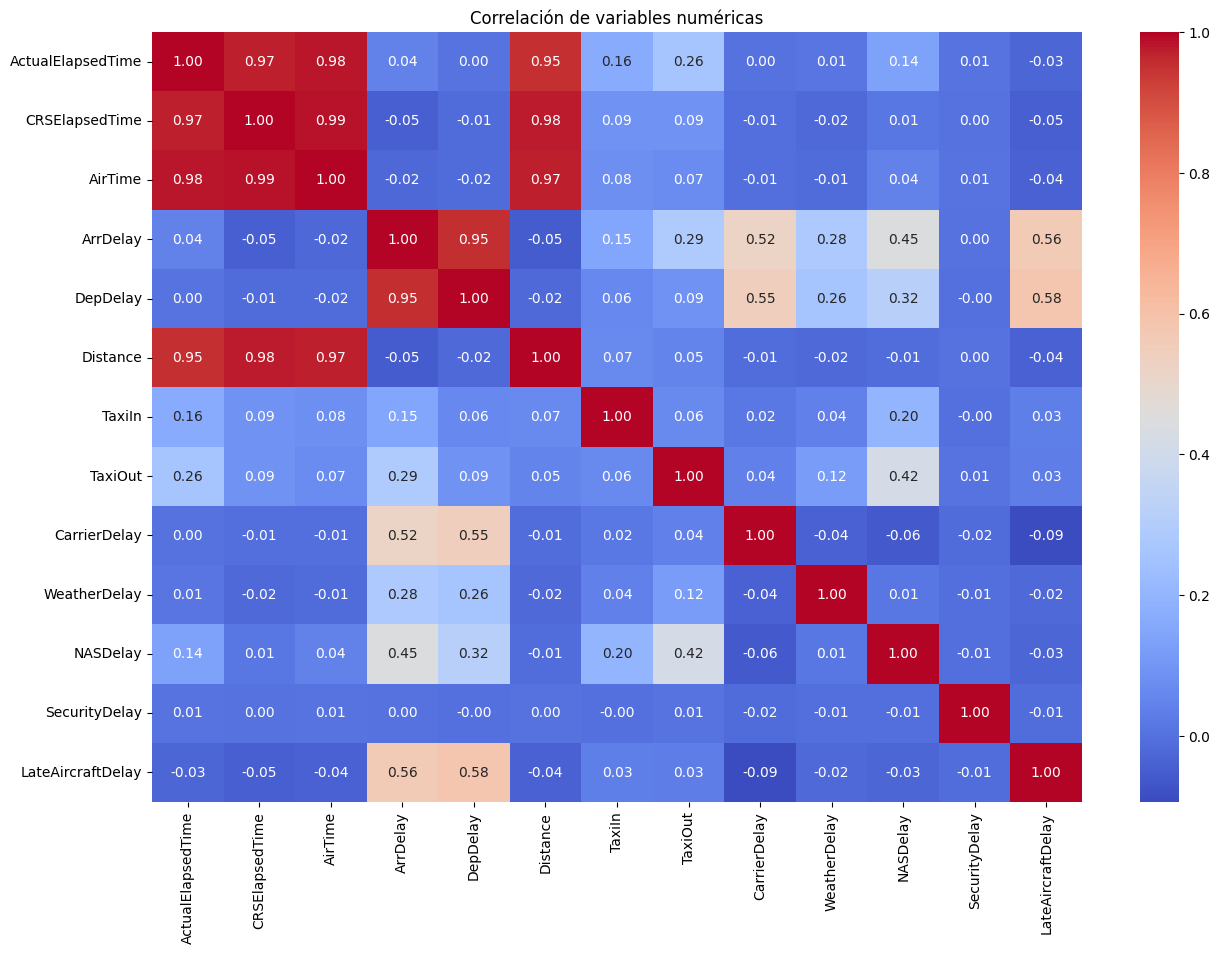

In [14]:
# Correlaciones
plt.figure(figsize=(15, 10))
plt.title("Correlación de variables numéricas")
sns.heatmap(df.select_dtypes(include=["float64", "int64"]).corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()



#### Por Aerolínea

<Axes: title={'center': '% de vuelos atrasados por aerolinea'}>

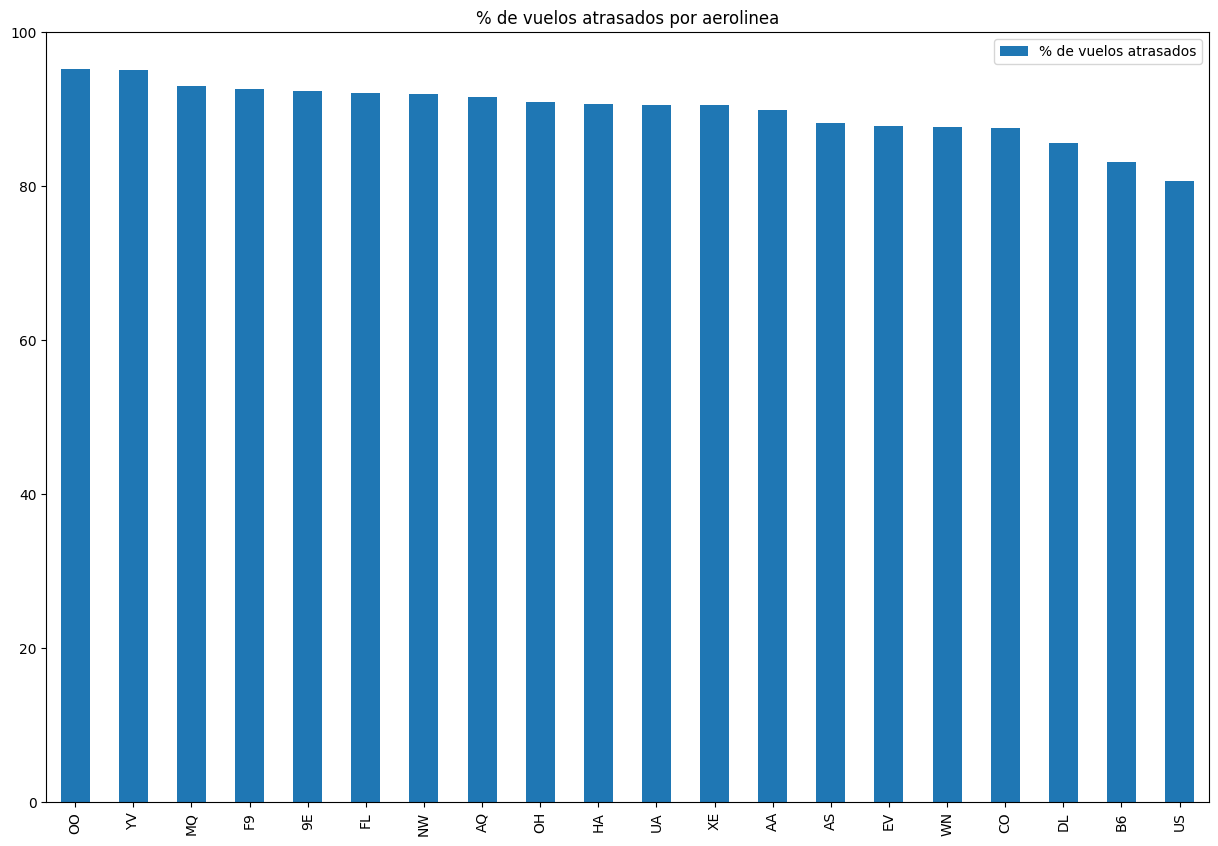

In [15]:
# Porcentaje de vuelos atrasados por aerolinea

aerolineas = {}
for i in df['UniqueCarrier'].unique():
    aerolineas[i] = [df[df['UniqueCarrier'] == i].shape[0], df[(df['UniqueCarrier'] == i) & (df['ArrDelay'] > 0)].shape[0]]

aerolineas = pd.DataFrame(aerolineas, index=['Total', 'Delayed']).T
aerolineas['% de vuelos atrasados'] = aerolineas['Delayed'] / aerolineas['Total'] * 100
aerolineas = aerolineas.sort_values('% de vuelos atrasados', ascending=False)
aerolineas.plot(kind='bar', y='% de vuelos atrasados', figsize=(15, 10), title='% de vuelos atrasados por aerolinea')



<Axes: title={'center': 'Minutos de atraso promedio por aerolínea (Por atraso de salida)'}>

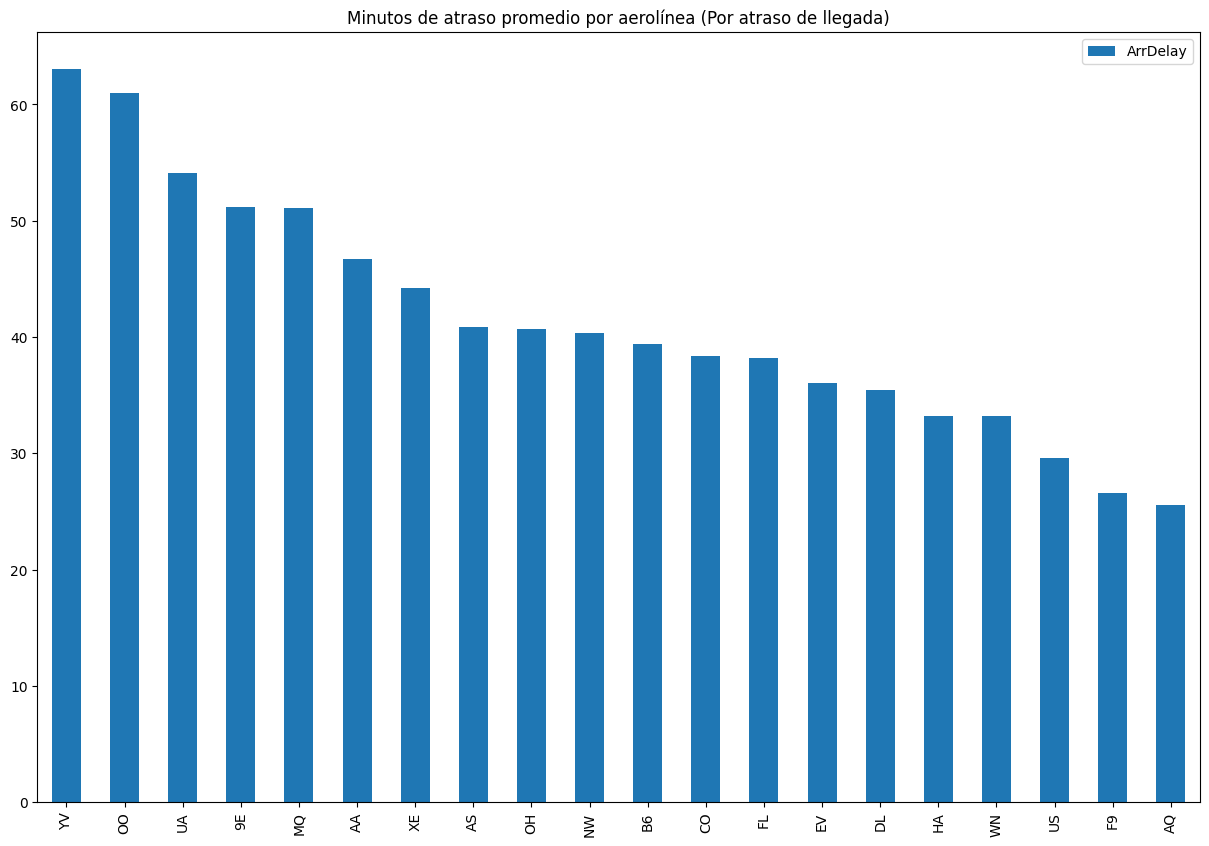

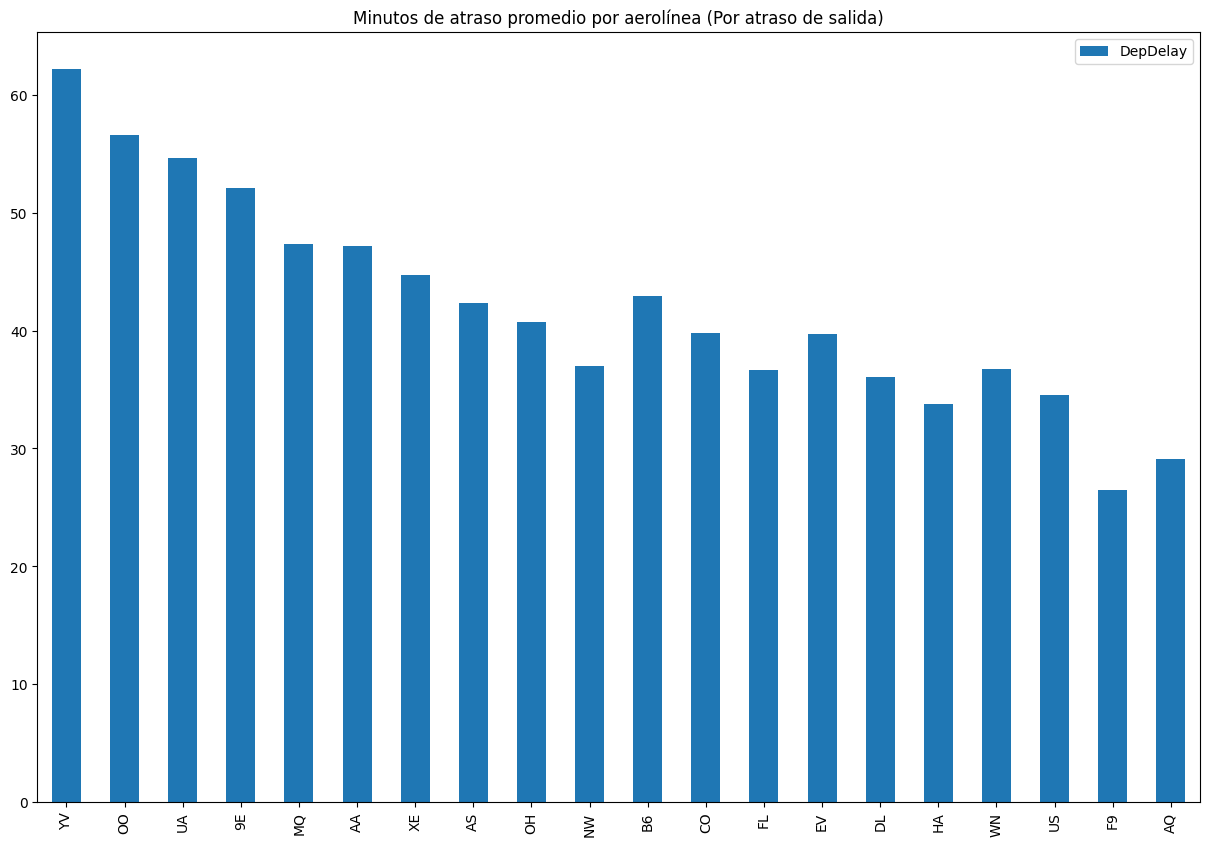

In [16]:
# Atrasos promedio por aerolínea
aerolinea_atrasos_promedio = {}
for i in df['UniqueCarrier'].unique():
    aerolinea_atrasos_promedio[i] = [df[df['UniqueCarrier'] == i]['ArrDelay'].mean(), df[df['UniqueCarrier'] == i]['DepDelay'].mean()]

aerolinea_atrasos_promedio = pd.DataFrame(aerolinea_atrasos_promedio, index=['ArrDelay', 'DepDelay']).T
aerolinea_atrasos_promedio = aerolinea_atrasos_promedio.sort_values('ArrDelay', ascending=False)

aerolinea_atrasos_promedio.plot(kind='bar', y='ArrDelay', figsize=(15, 10), title='Minutos de atraso promedio por aerolínea (Por atraso de llegada)')
aerolinea_atrasos_promedio.plot(kind='bar', y='DepDelay', figsize=(15, 10), title='Minutos de atraso promedio por aerolínea (Por atraso de salida)')



#### Por día de la semana y mes

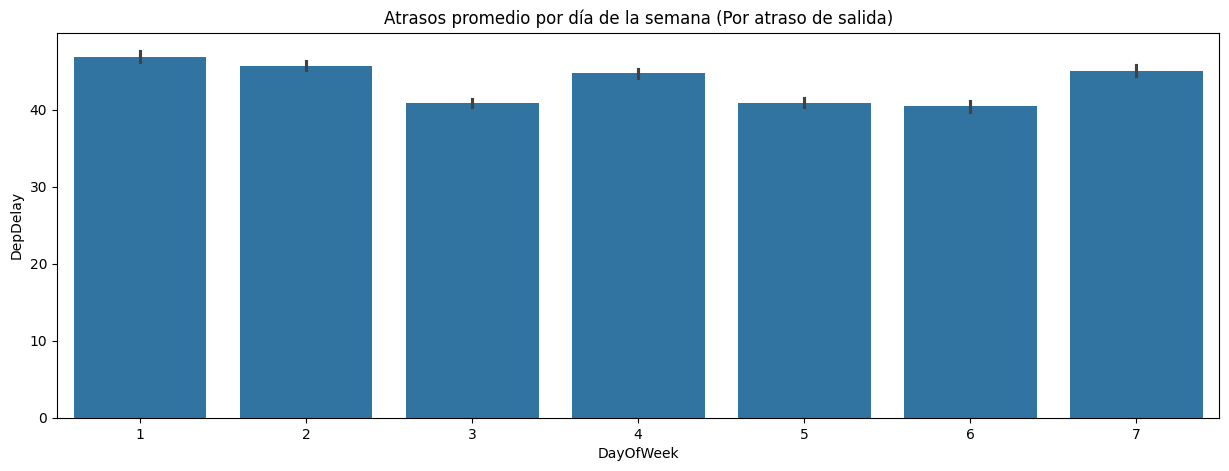

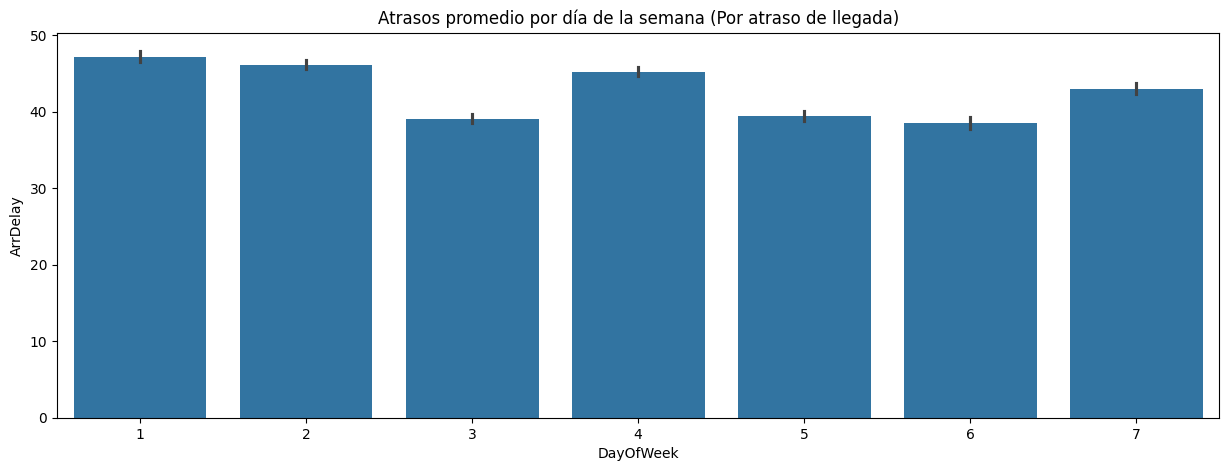

In [17]:
# Atrasos promedio por día de la semana
plt.figure(figsize=(15, 5))
plt.title('Atrasos promedio por día de la semana (Por atraso de salida)')
sns.barplot(data=df, x='DayOfWeek', y='DepDelay')
plt.show()

plt.figure(figsize=(15, 5))
plt.title('Atrasos promedio por día de la semana (Por atraso de llegada)')
sns.barplot(data=df, x='DayOfWeek', y='ArrDelay')
plt.show()



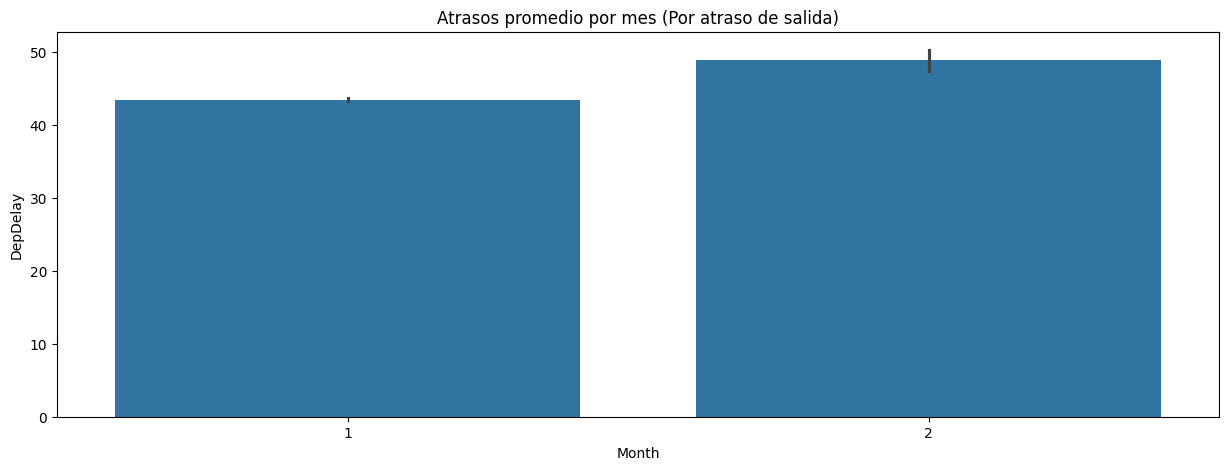

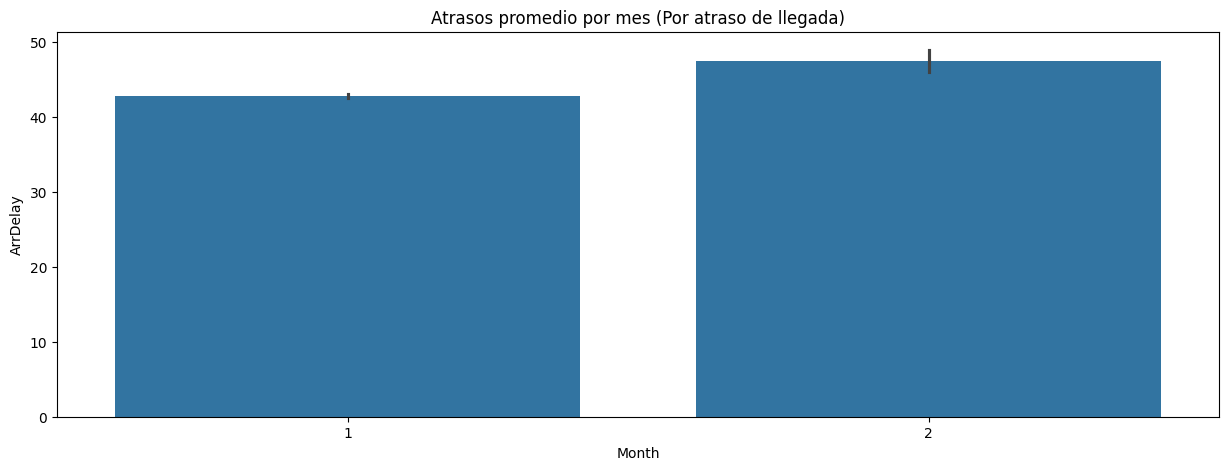

In [18]:
# Atrasos promedio por mes
plt.figure(figsize=(15, 5))
plt.title('Atrasos promedio por mes (Por atraso de salida)')
sns.barplot(data=df, x='Month', y='DepDelay')
plt.show()

plt.figure(figsize=(15, 5))
plt.title('Atrasos promedio por mes (Por atraso de llegada)')
sns.barplot(data=df, x='Month', y='ArrDelay')
plt.show()



#### Por aeropuertos

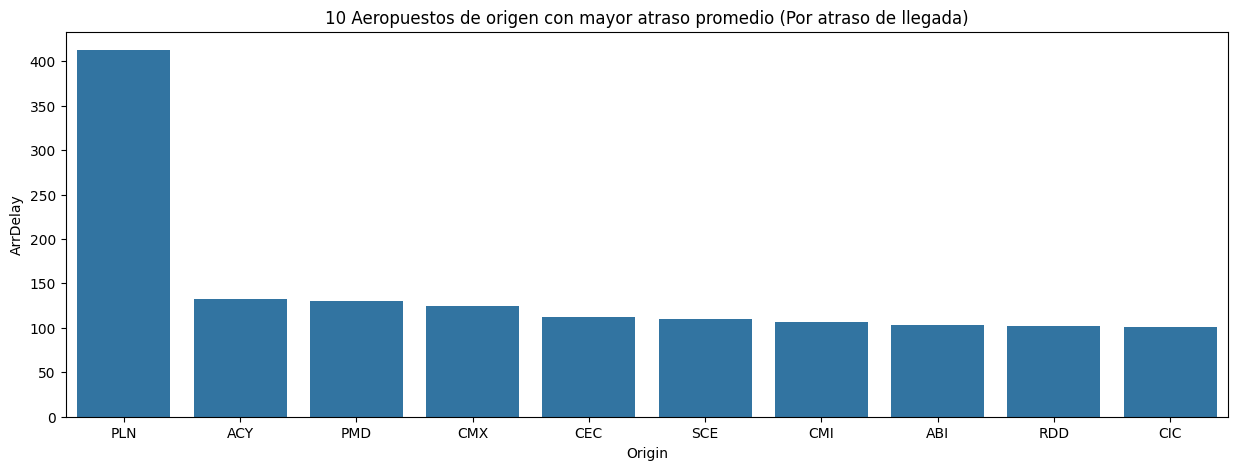

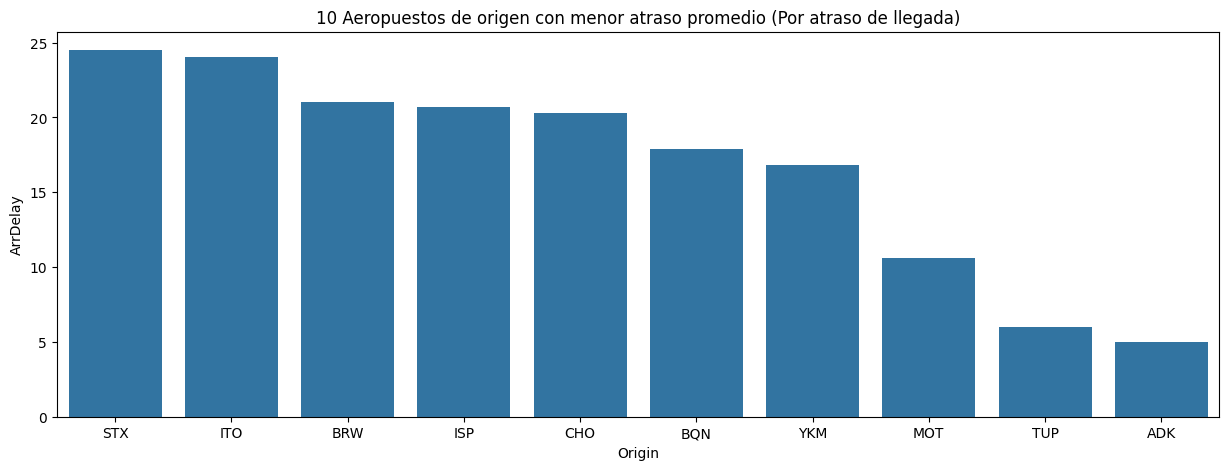

In [19]:
# 10 Aeropuertos de origen con mayor atraso promedio (Por atraso de llegada)

aero_delay_dict = {}
for aero in df['Origin'].unique():
    aero_delay_dict[aero] = df[df['Origin'] == aero]['ArrDelay'].mean()

aero_delay_df = pd.DataFrame(list(aero_delay_dict.items()), columns=['Origin', 'ArrDelay'])
aero_delay_df = aero_delay_df.sort_values(by='ArrDelay', ascending=False)

plt.figure(figsize=(15, 5))
plt.title('10 Aeropuestos de origen con mayor atraso promedio (Por atraso de llegada)')
sns.barplot(data=aero_delay_df.head(10), x='Origin', y='ArrDelay')
plt.show()

# 10 Aeropuestos de origen con menor atraso promedio (Por atraso de llegada)
plt.figure(figsize=(15, 5))
plt.title('10 Aeropuestos de origen con menor atraso promedio (Por atraso de llegada)')
sns.barplot(data=aero_delay_df.tail(10), x='Origin', y='ArrDelay')
plt.show()


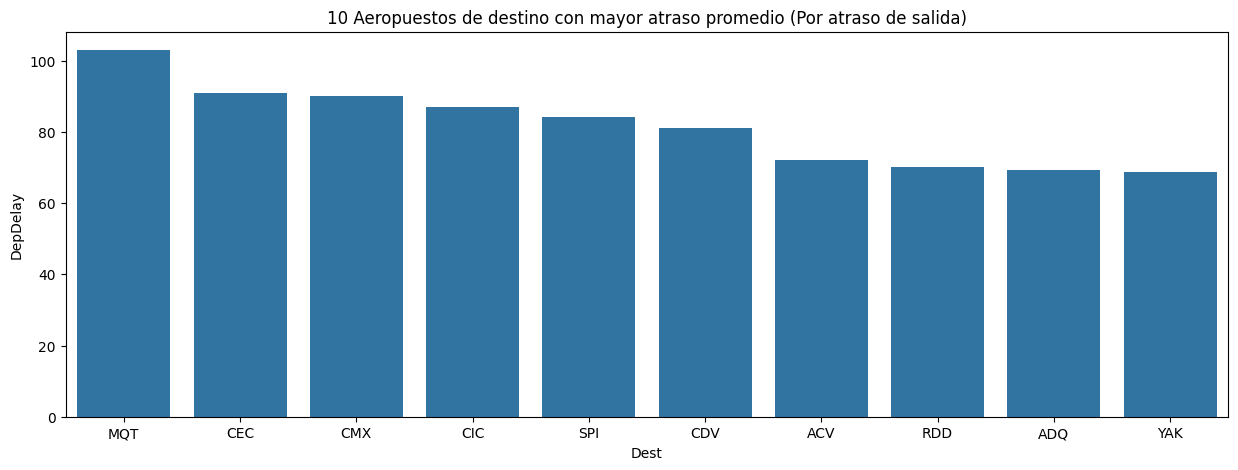

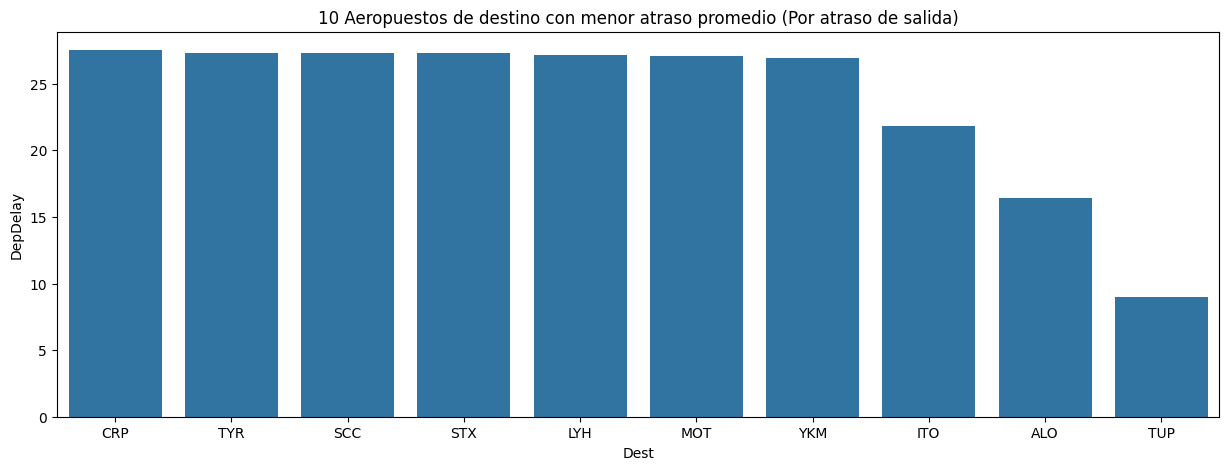

In [20]:
# 10 Aeropuertos de destino con mayor atraso promedio (Por atraso de salida)

aero_delay_dict = {}
for aero in df['Dest'].unique():
    aero_delay_dict[aero] = df[df['Dest'] == aero]['DepDelay'].mean()

aero_delay_df = pd.DataFrame(list(aero_delay_dict.items()), columns=['Dest', 'DepDelay'])
aero_delay_df = aero_delay_df.sort_values(by='DepDelay', ascending=False)

plt.figure(figsize=(15, 5))
plt.title('10 Aeropuestos de destino con mayor atraso promedio (Por atraso de salida)')
sns.barplot(data=aero_delay_df.head(10), x='Dest', y='DepDelay')
plt.show()

# 10 Aeropuestos de destino con menor atraso promedio (Por atraso de salida)
plt.figure(figsize=(15, 5))
plt.title('10 Aeropuestos de destino con menor atraso promedio (Por atraso de salida)')
sns.barplot(data=aero_delay_df.tail(10), x='Dest', y='DepDelay')
plt.show()



# K means

##Clusters

In [26]:
# Importación de bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# Seleccionar columnas numéricas
numeric_df = df.select_dtypes(include=[np.number])

In [28]:
# Normalizar las columnas
variables_norm = (numeric_df - numeric_df.min()) / (numeric_df.max() - numeric_df.min())

In [31]:
# Método del codo para encontrar el número óptimo de clusters
wscc = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, max_iter=300, random_state=42)
    kmeans.fit(variables_norm)
    wscc.append(kmeans.inertia_)  # Inercia: suma de los errores cuadráticos dentro de los clusters

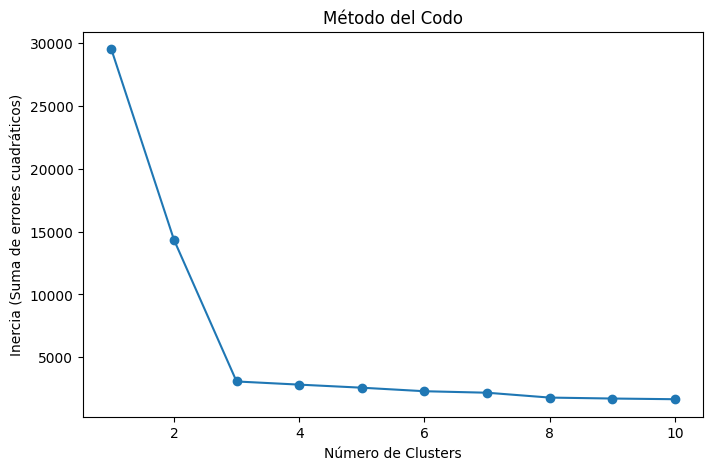

In [32]:
# Gráfico del método del codo
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wscc, marker='o')
plt.title("Método del Codo")
plt.xlabel("Número de Clusters")
plt.ylabel("Inercia (Suma de errores cuadráticos)")
plt.show()

In [33]:
# Crear el modelo con 3 clusters y random_state para consistencia
clustering = KMeans(n_clusters=3, max_iter=300, random_state=42)
clustering.fit(variables_norm)

KMeans(n_clusters=3, random_state=42)

In [34]:
# Agregar clasificación al DataFrame original
df['KMeans_Cluster'] = clustering.labels_

In [51]:
# Tomar una muestra del 20% de los datos para t-SNE
sample_data = variables_norm.sample(frac=0.2, random_state=42)

In [52]:
# Aplicar t-SNE a la muestra
tsne = TSNE(n_components=2, random_state=42, n_iter=250, perplexity=30)
tsne_aerolineas = tsne.fit_transform(sample_data)
tsne_aerolineas_df = pd.DataFrame(data=tsne_aerolineas, columns=["Componente_1", "Componente_2"])
sample_clusters = df.loc[sample_data.index, 'KMeans_Cluster'].reset_index(drop=True)
tsne_nombres_aerolineas = pd.concat([tsne_aerolineas_df, sample_clusters], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


In [53]:
# Convertir KMeans_Cluster a tipo entero para la visualización
tsne_nombres_aerolineas['KMeans_Cluster'] = tsne_nombres_aerolineas['KMeans_Cluster'].astype(int)

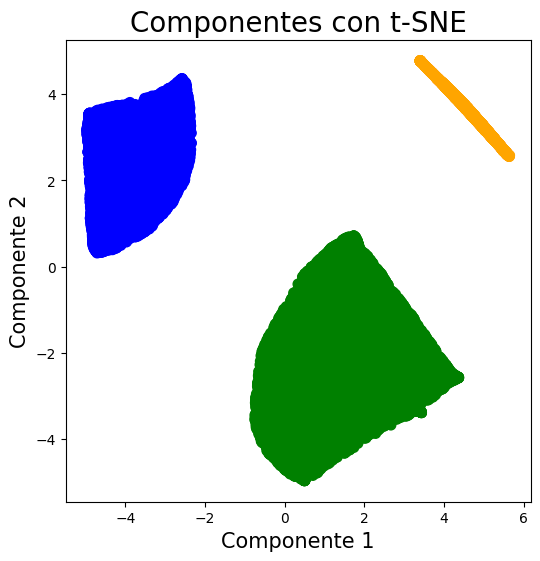

In [54]:
# Visualización con t-SNE
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel("Componente 1", fontsize=15)
ax.set_ylabel("Componente 2", fontsize=15)
ax.set_title("Componentes con t-SNE", fontsize=20)

color_theme = np.array(['blue', 'green', 'orange'])
ax.scatter(x=tsne_nombres_aerolineas.Componente_1, y=tsne_nombres_aerolineas.Componente_2,
           c=color_theme[tsne_nombres_aerolineas.KMeans_Cluster], s=50)
plt.show()

##Análisis

In [40]:
#Estadísticas grupo 0

df_filtrado0 = df[df['KMeans_Cluster'] == 0]
df_filtrado0.describe()

,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,flightDate,KMeans_Cluster
count,63835.000000,63835.000000,63835.000000,63835.000000,63835.000000,63835.000000,63835.000000,63835.000000,63835.000000,63835.000000,63835.000000,63835.000000,63835.000000,63835,63835.0
mean,157.699099,158.641059,131.387123,41.395974,42.337871,945.179729,7.183489,19.128488,12.076635,1.960602,10.907339,0.071356,15.572445,2008-01-15 11:06:28.846244096,0.0
min,82.000000,42.000000,26.000000,-67.000000,6.000000,151.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008-01-01 00:00:00,0.0
25%,135.000000,138.000000,110.000000,8.000000,12.000000,762.000000,4.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008-01-06 00:00:00,0.0
50%,154.000000,155.000000,128.000000,25.000000,24.000000,925.000000,6.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008-01-16 00:00:00,0.0
75%,176.000000,176.000000,149.000000,55.000000,52.000000,1076.000000,8.000000,22.000000,10.000000,0.000000,8.000000,0.000000,17.000000,2008-01-24 00:00:00,0.0
max,427.000000,245.000000,244.000000,1525.000000,1275.000000,1811.000000,150.000000,322.000000,1158.000000,467.000000,896.000000,136.000000,897.000000,2008-02-07 00:00:00,0.0
std,28.861838,26.538986,26.038983,55.280576,50.485608,231.588196,5.530678,14.785410,34.361986,14.265218,29.614244,1.331013,34.459562,NaN,0.0


In [41]:
#Estadísticas grupo 1

df_filtrado1 = df[df['KMeans_Cluster'] == 1]
df_filtrado1.describe()

,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,flightDate,KMeans_Cluster
count,103688.000000,103688.000000,103688.000000,103688.000000,103688.000000,103688.000000,103688.000000,103688.000000,103688.000000,103688.000000,103688.000000,103688.000000,103688.000000,103688,103688.0
mean,83.798501,83.987945,60.796428,44.473362,44.662844,369.323721,6.292994,16.709079,12.982197,2.589364,8.275162,0.062418,18.926616,2008-01-16 06:01:39.992284672,1.0
min,19.000000,19.000000,0.000000,-66.000000,6.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008-01-01 00:00:00,1.0
25%,66.000000,68.000000,46.000000,11.000000,13.000000,239.000000,4.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008-01-06 00:00:00,1.0
50%,82.000000,83.000000,60.000000,26.000000,26.000000,353.000000,5.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008-01-17 00:00:00,1.0
75%,100.000000,100.000000,76.000000,58.000000,56.000000,491.000000,7.000000,20.000000,10.000000,0.000000,4.000000,0.000000,23.000000,2008-01-25 00:00:00,1.0
max,284.000000,157.000000,145.000000,1357.000000,1355.000000,843.000000,152.000000,247.000000,1120.000000,1049.000000,1357.000000,102.000000,479.000000,2008-02-07 00:00:00,1.0
std,23.192422,21.136294,19.485658,55.941068,52.725995,158.527719,4.783978,11.731690,36.063755,19.361495,27.346628,1.416796,37.847048,NaN,0.0


In [42]:
#Estadísticas grupo 2

df_filtrado2 = df[df['KMeans_Cluster'] == 2]
df_filtrado2.describe()

,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,flightDate,KMeans_Cluster
count,21734.000000,21734.000000,21734.000000,21734.000000,21734.000000,21734.000000,21734.000000,21734.000000,21734.000000,21734.000000,21734.000000,21734.000000,21734.000000,21734,21734.0
mean,280.897350,283.336892,253.271924,40.296586,42.736128,1962.513435,7.594460,20.030965,12.233413,2.225683,10.626346,0.087697,15.055673,2008-01-14 21:23:58.078586880,2.0
min,189.000000,78.000000,168.000000,-66.000000,6.000000,321.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008-01-01 00:00:00,2.0
25%,240.000000,242.000000,214.000000,6.000000,12.000000,1628.000000,5.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008-01-05 00:00:00,2.0
50%,268.000000,270.000000,240.000000,23.000000,23.000000,1846.000000,6.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008-01-14 00:00:00,2.0
75%,311.000000,315.000000,283.000000,55.000000,52.000000,2288.000000,9.000000,23.000000,12.000000,0.000000,9.000000,0.000000,15.000000,2008-01-23 00:00:00,2.0
max,693.000000,660.000000,636.000000,1147.000000,1172.000000,4962.000000,189.000000,383.000000,1068.000000,489.000000,501.000000,80.000000,799.000000,2008-02-07 00:00:00,2.0
std,56.090829,54.172271,53.238664,58.256604,53.687553,439.979622,6.431334,13.810868,34.954840,17.638619,27.711696,1.630571,35.622485,NaN,0.0


Gráficas

In [57]:
variable_groups = {
    "Tiempo de Vuelo y Desempeño General": ['ActualElapsedTime', 'AirTime', 'CRSElapsedTime'],
    "Retrasos": ['ArrDelay', 'DepDelay', 'CarrierDelay', 'LateAircraftDelay', 'NASDelay', 'SecurityDelay', 'WeatherDelay'],
    "Tiempo en Tierra": ['TaxiIn', 'TaxiOut'],
    "Distancia del Vuelo": ['Distance']
}

<ipython-input-61-23140ff7b6e2>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='KMeans_Cluster', y=column, data=df, ci=None)


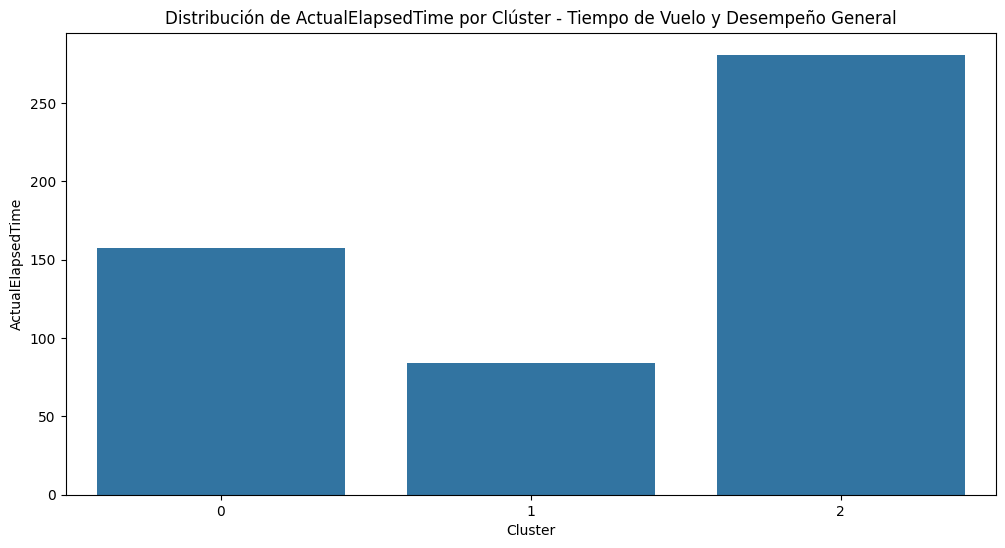

<ipython-input-61-23140ff7b6e2>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='KMeans_Cluster', y=column, data=df, ci=None)


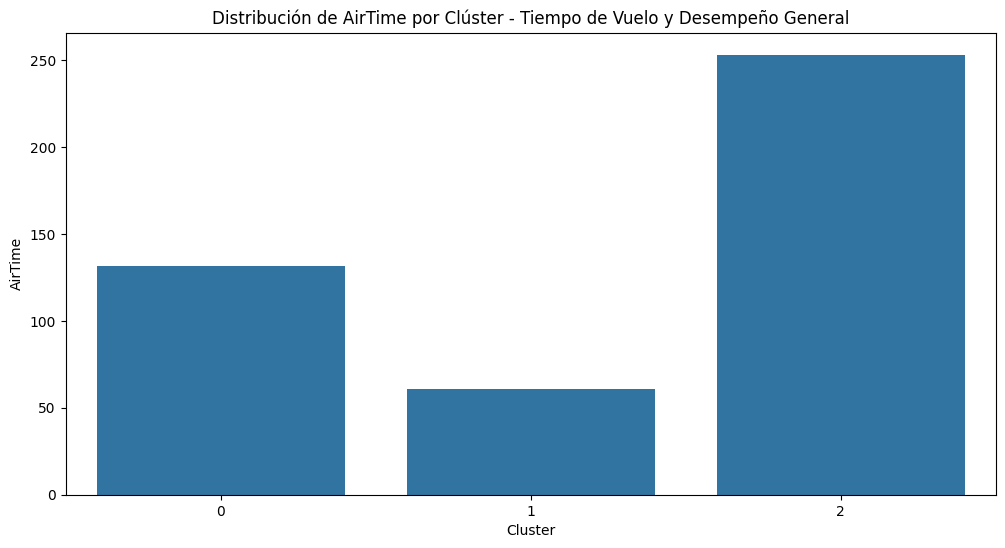

<ipython-input-61-23140ff7b6e2>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='KMeans_Cluster', y=column, data=df, ci=None)


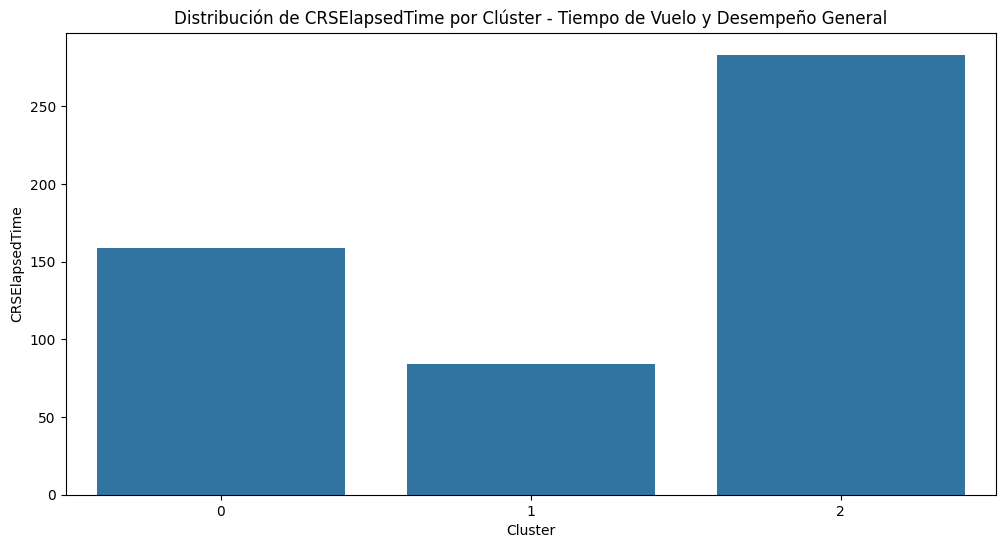

<ipython-input-61-23140ff7b6e2>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='KMeans_Cluster', y=column, data=df, ci=None)


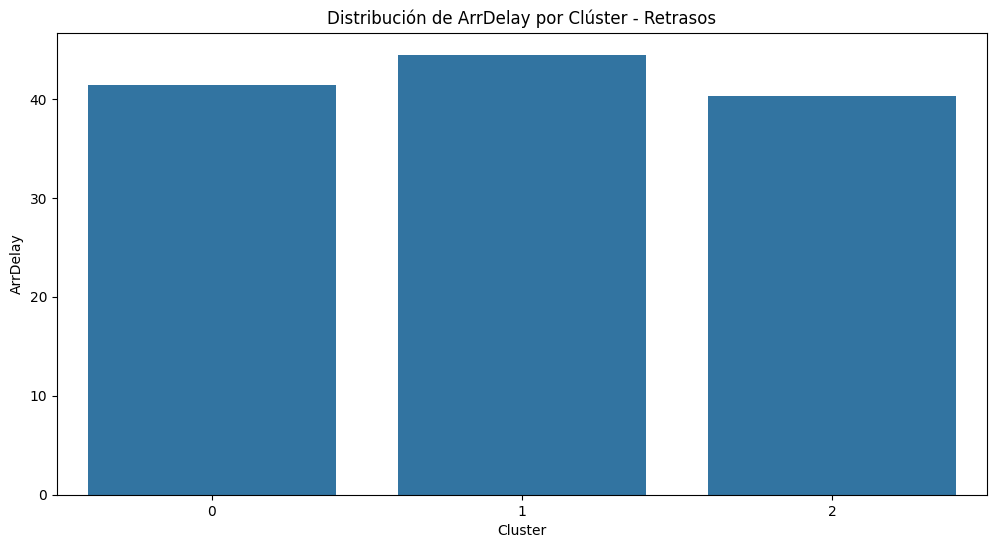

<ipython-input-61-23140ff7b6e2>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='KMeans_Cluster', y=column, data=df, ci=None)


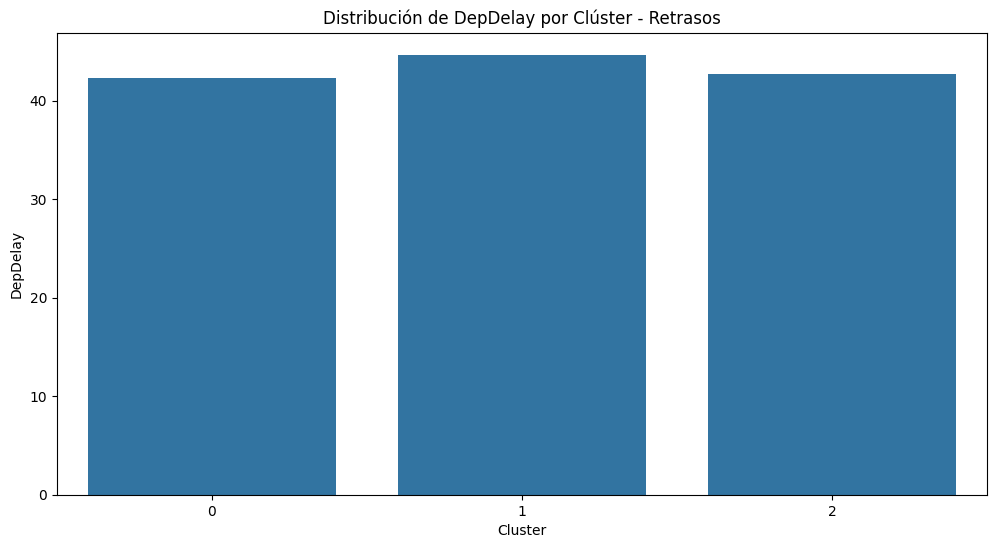

<ipython-input-61-23140ff7b6e2>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='KMeans_Cluster', y=column, data=df, ci=None)


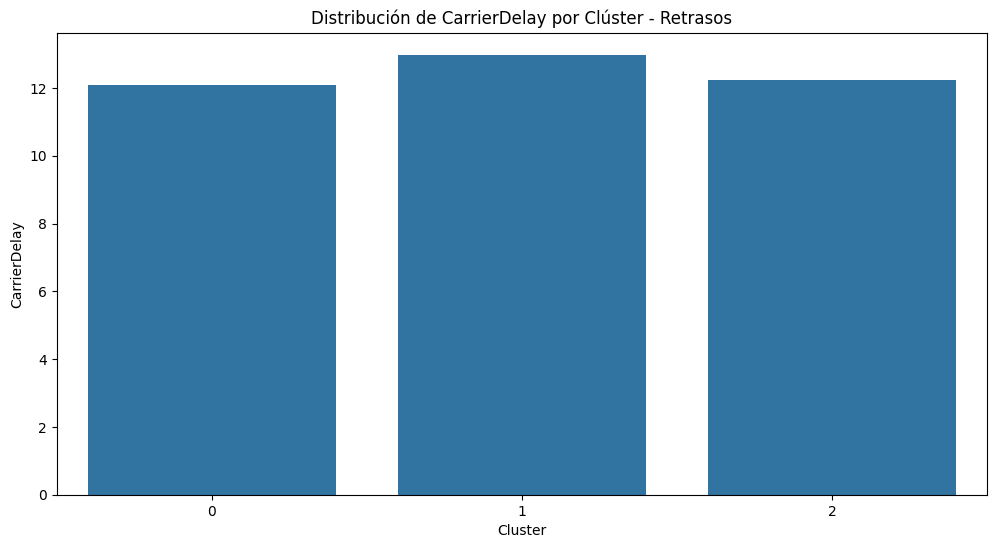

<ipython-input-61-23140ff7b6e2>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='KMeans_Cluster', y=column, data=df, ci=None)


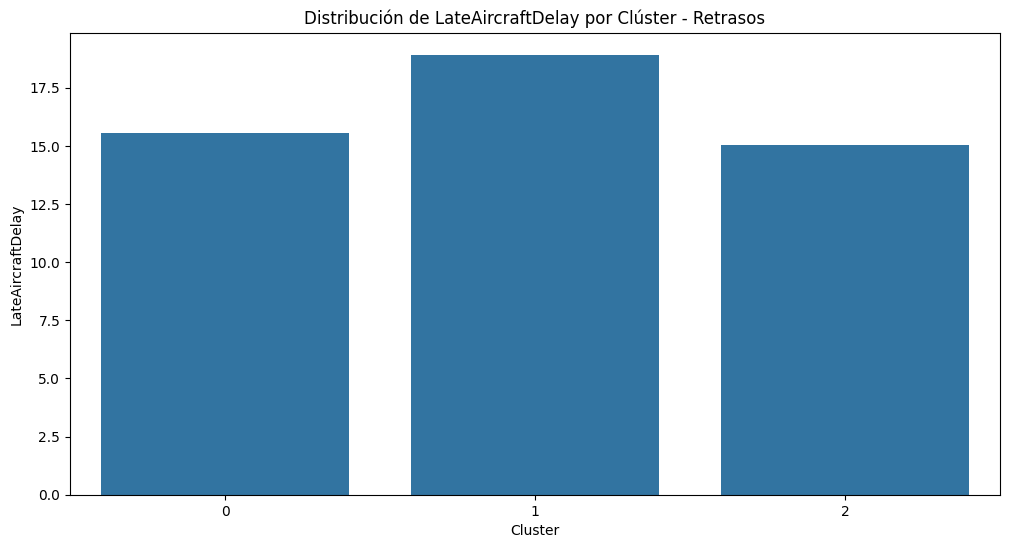

<ipython-input-61-23140ff7b6e2>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='KMeans_Cluster', y=column, data=df, ci=None)


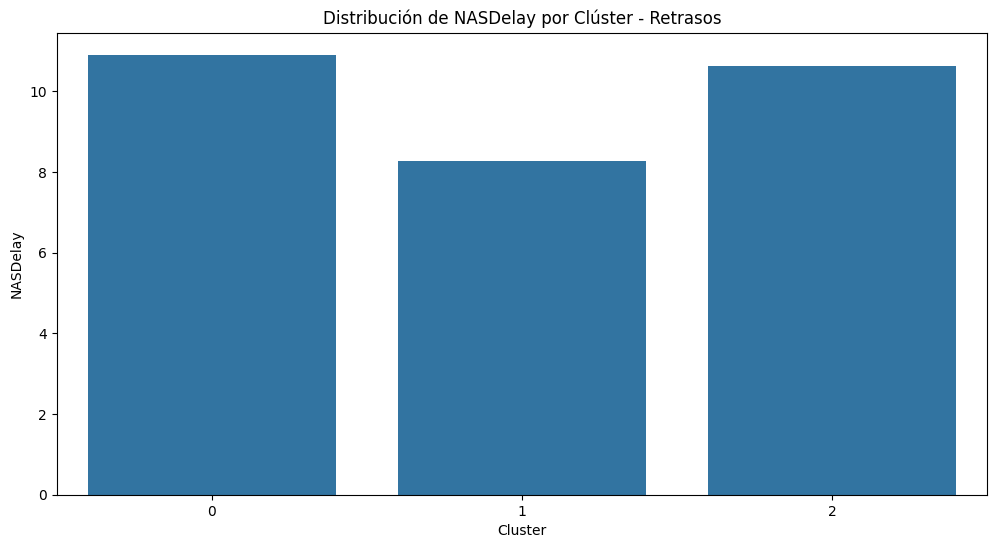

<ipython-input-61-23140ff7b6e2>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='KMeans_Cluster', y=column, data=df, ci=None)


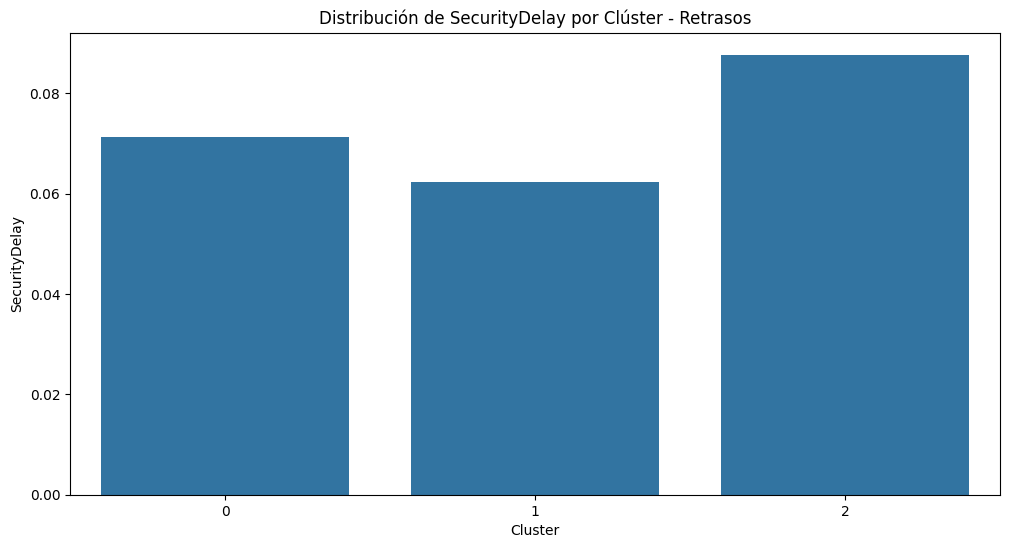

<ipython-input-61-23140ff7b6e2>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='KMeans_Cluster', y=column, data=df, ci=None)


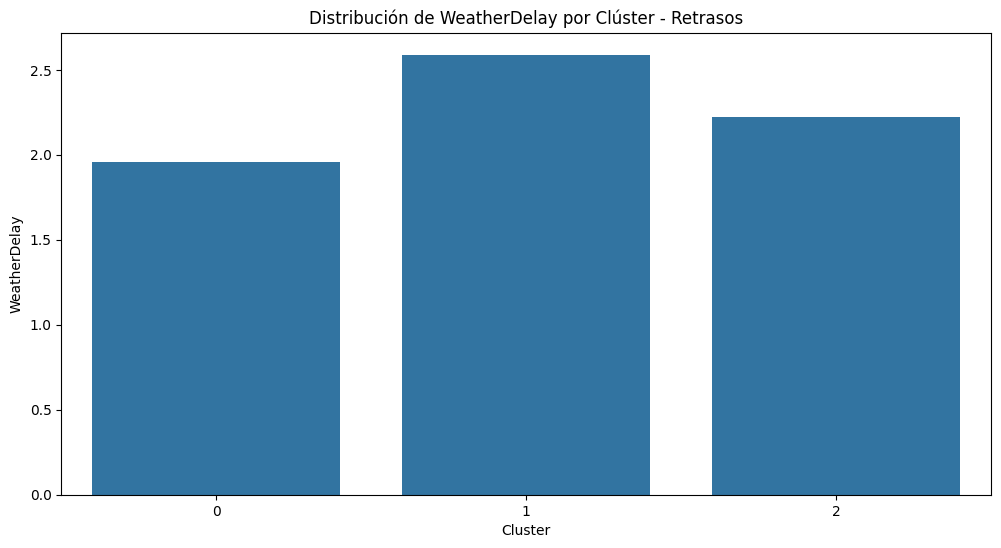

<ipython-input-61-23140ff7b6e2>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='KMeans_Cluster', y=column, data=df, ci=None)


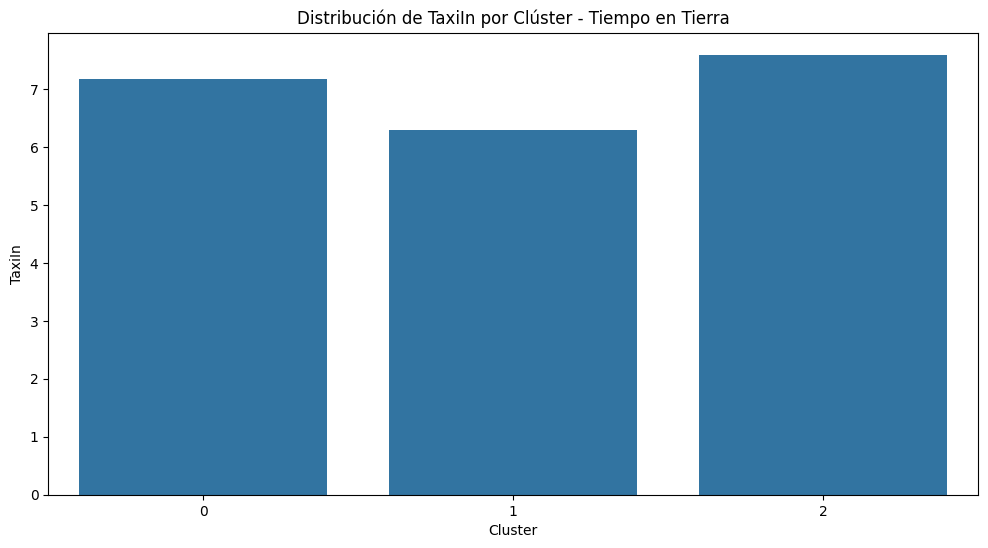

<ipython-input-61-23140ff7b6e2>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='KMeans_Cluster', y=column, data=df, ci=None)


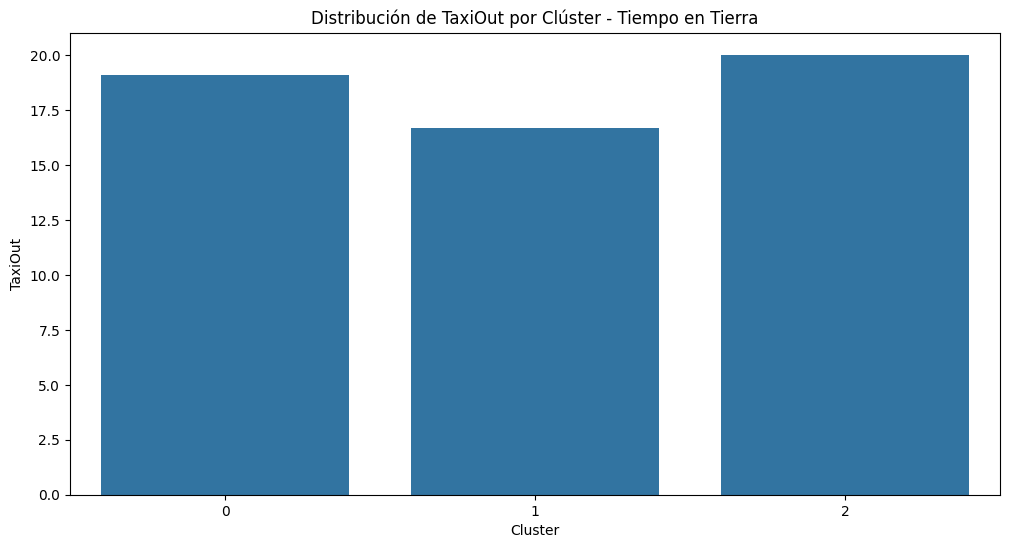

<ipython-input-61-23140ff7b6e2>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='KMeans_Cluster', y=column, data=df, ci=None)


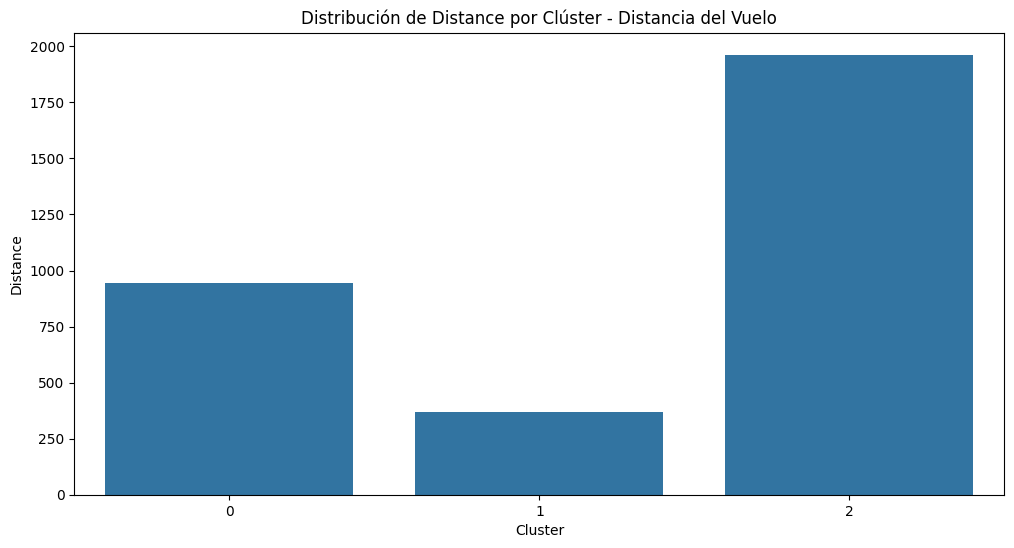

In [61]:
# Itera sobre cada grupo de variables
for group, columns in variable_groups.items():
    for column in columns:
        plt.figure(figsize=(12, 6))
        sns.barplot(x='KMeans_Cluster', y=column, data=df, ci=None)
        plt.title(f'Distribución de {column} por Clúster - {group}')
        plt.xlabel('Cluster')
        plt.ylabel(column)
        plt.show()


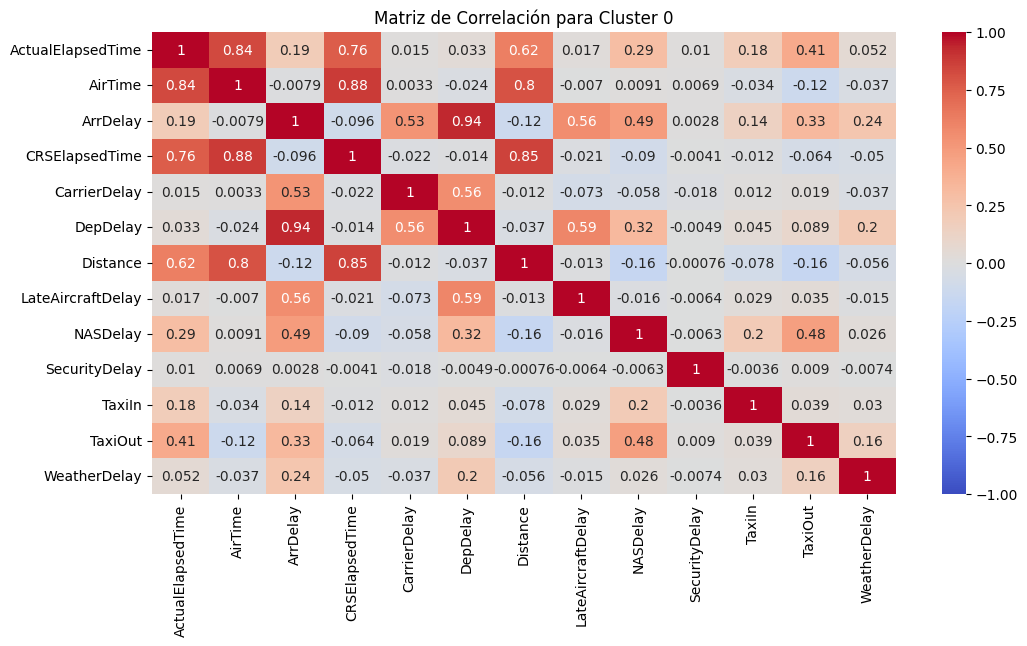

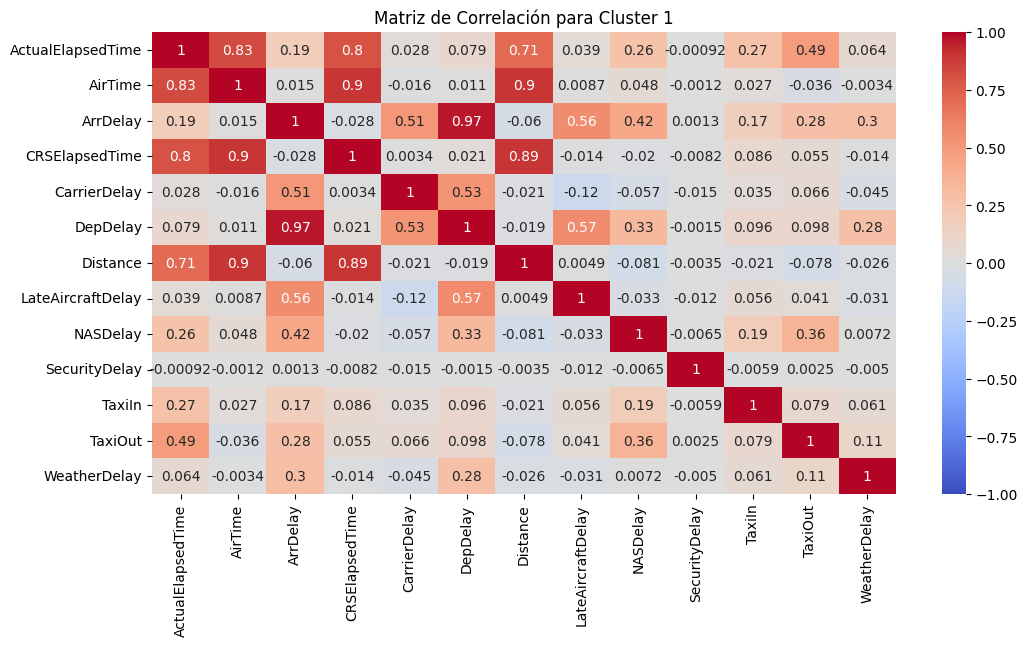

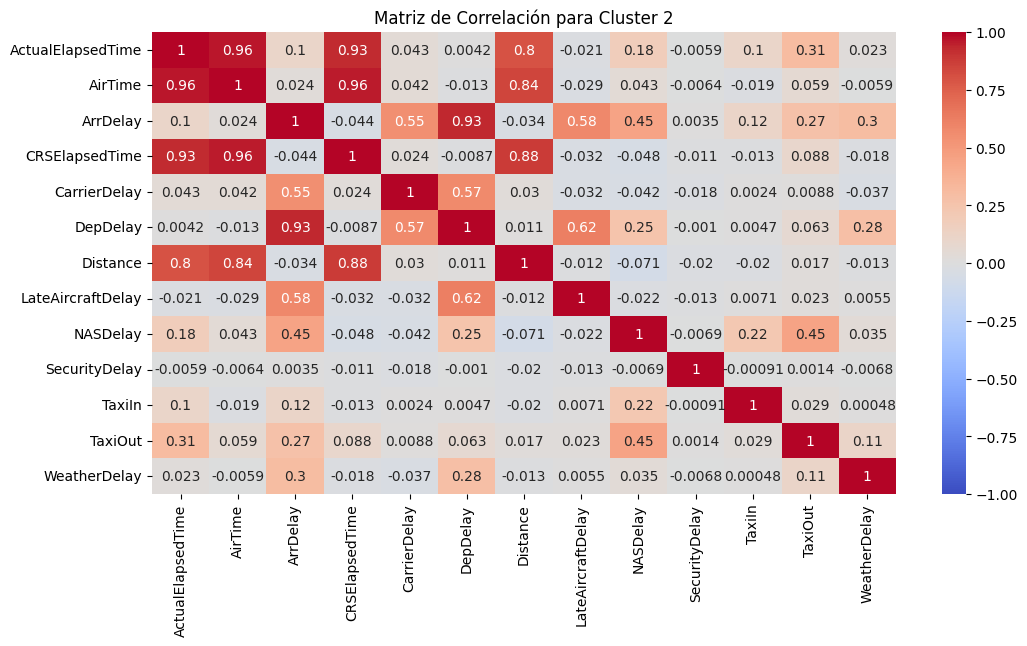

In [48]:
# Selecciona las columnas numéricas excluyendo 'KMeans_Cluster'
numeric_columns = numeric_df.columns.difference(['KMeans_Cluster'])

# Itera sobre cada cluster y genera un heatmap de correlación
for cluster in df['KMeans_Cluster'].unique():
    # Filtra los datos para el cluster actual
    cluster_data = df[df['KMeans_Cluster'] == cluster][numeric_columns]

    # Calcula la matriz de correlación
    corr_matrix = cluster_data.corr()

    # Genera el heatmap
    plt.figure(figsize=(12, 6))
    sns.heatmap(data=corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
    plt.title(f'Matriz de Correlación para Cluster {cluster}')
    plt.show()
